In [6]:
from numpy import linalg as LA
import numpy as np
import math

In [2]:
n = 632
path = "Result/task2/spr_simulation_N_632_phi_0.17_a_5_U0_3e-20_k_0.bin"

def read_data(path):
    with open(path, "br") as bf:
        data = np.fromfile(bf, np.float64)
    return data


def get_Pos_Vel(data, n, t):
    a = (t - 1)*(4*n + 1)
    b = t*(4*n + 1)
    
    x1 = []
    y1 = []
    
    V_x = []
    V_y = []
    
    i = 0
    for d in range(a,b - 1):
        if (b - a - i)%4 == 0:
            x1.append(data[d])
        elif (b - a - i + 1)%4 == 0:
            y1.append(data[d])
        elif (b - a - i + 2)%4 == 0:
            V_x.append(data[d])
        else:
            V_y.append(data[d])
        i = i + 1
    
    return [x1, y1, V_x, V_y]

In [3]:
def SumLabmdaWithVelocity(Va, Vb, a, coef_lambda):
    summ = 0.00
    
    for i in range(1,a):
        for k in range(1,a):
            summ = summ + i*coef_lambda*Va - k*coef_lambda*Vb
    return summ


def grad_in_radius(a, b):
    grad_x_r = 0
    grad_y_r = 0 

    yi = y[a] - y[b] + SumLabmdaWithVelocity(v_y[a], v_y[b], 5, coef_lambda)
    xi = x[a] - x[b] + SumLabmdaWithVelocity(v_x[a], v_x[b], 5, coef_lambda)
    abs_r = math.sqrt(xi**2 + yi**2)
    if abs_r > 15*coef_lambda or abs_r <=0:
        return [0, 0]
    
    exp_r = math.exp(- abs_r / coef_lambda)
      
    grad_x_r = grad_x_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * xi
    grad_y_r = grad_y_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * yi
    grad_x_r = grad_x_r * U_0 / (n**2) 
    grad_y_r = grad_y_r * U_0 / (n**2)
    return [grad_x_r, grad_y_r]
    

def grad(alfa, beta):
    Xgrad_mod = grad_in_radius(alfa, beta)[0]
    Ygrad_mod = grad_in_radius(alfa, beta)[1]
    return [[Xgrad_mod], [Ygrad_mod]]

In [4]:
import time

size = 100
#L = 6.66904e-05
t = 20
coef_lambda = 5e-07
U_0 = 3e-20
L = 5*coef_lambda

def length_vector(v):                               # vector 2x1
    try:
        return math.sqrt(v[0][0]**2 + v[1][0]**2)         # (x^2 + y^2)^0.5
    except TypeError:
        print("TypeError!")


def add_element_to_matrix(size, matrix, u, v, summ):
    if abs(u) > 1/2*L:
        if u > 0:
            u = u - L
        else:
            u = u + L
        
    if abs(v) > 1/2*L:
        if u > 0:
            v = v - L
        else:
            v = v + L    

    A =  int(size / 2 + int(u*size/L))
    B =  int(size / 2 + int(v*size/L))
    
    if abs(A) < size and abs(B) < size:
        matrix[A][B] = matrix[A][B] + summ

        
start_time = time.time()
matrix_force_field = np.zeros((size, size))

for i in range(0, 80):
    t = 100*i + 20
    x, y, v_x, v_y = get_Pos_Vel(read_data(path), n, t)

    print("\n\n T = ", t)
    print("Start\nProgress:", end="")
    for k in range(0, n):
        for b in range(0, n):
            if k != b:
                dif = np.array([[x[k] - x[b]], [y[k] - y[b]]])

                vx = v_x[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                vy = v_y[b] / math.sqrt(v_x[b]*v_x[b] + v_y[b]*v_y[b])
                Q = np.matrix([[vy, -vx], [vx, vy]])

                new_coordinates = np.dot(Q, dif)

                x_y = new_coordinates.tolist() # convert np.array -> list [[x], [y]]
                f_x = x_y[0][0]
                f_y = x_y[1][0]                   # maybe, x_y[1][0]

                forse_ab = np.array(grad(k, b))
                abs_forse = length_vector(forse_ab.tolist())

                if abs_forse != 0:
                    add_element_to_matrix(size, matrix_force_field, f_x, f_y , abs_forse)   
        if k % 100 == 0:
            print("# ", k, " ", end="")

    print("\n--- %s seconds ---" % (time.time() - start_time))



 T =  20
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 30.743138074874878 seconds ---


 T =  120
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 60.70318055152893 seconds ---


 T =  220
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 91.2281928062439 seconds ---


 T =  320
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 122.70840859413147 seconds ---


 T =  420
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 152.57823038101196 seconds ---


 T =  520
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 183.13823008537292 seconds ---


 T =  620
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 212.7682785987854 seconds ---


 T =  720
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 244.1186842918396 seconds ---


 T =  820
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  50

Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2299.9438993930817 seconds ---


 T =  7120
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2332.0105788707733 seconds ---


 T =  7220
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2365.6604981422424 seconds ---


 T =  7320
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2397.0056042671204 seconds ---


 T =  7420
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2428.328696012497 seconds ---


 T =  7520
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2460.679447412491 seconds ---


 T =  7620
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2491.8242526054382 seconds ---


 T =  7720
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  600  
--- 2523.0863058567047 seconds ---


 T =  7820
Start
Progress:#  0  #  100  #  200  #  300  #  400  #  500  #  

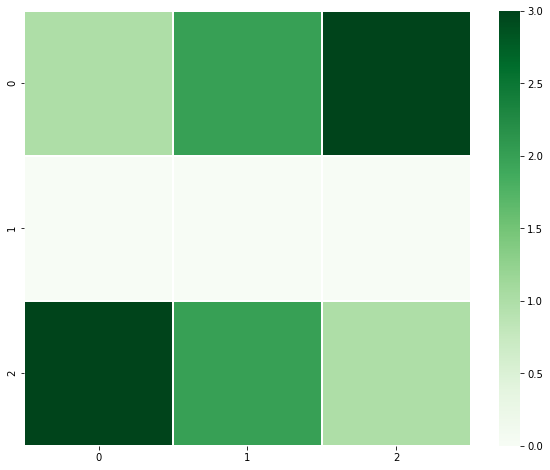

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

z = [[1, 2, 3],
     [0, 0, 0],
     [3, 2, 1]]

ax = sns.heatmap(z, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(10,8)
plt.show()

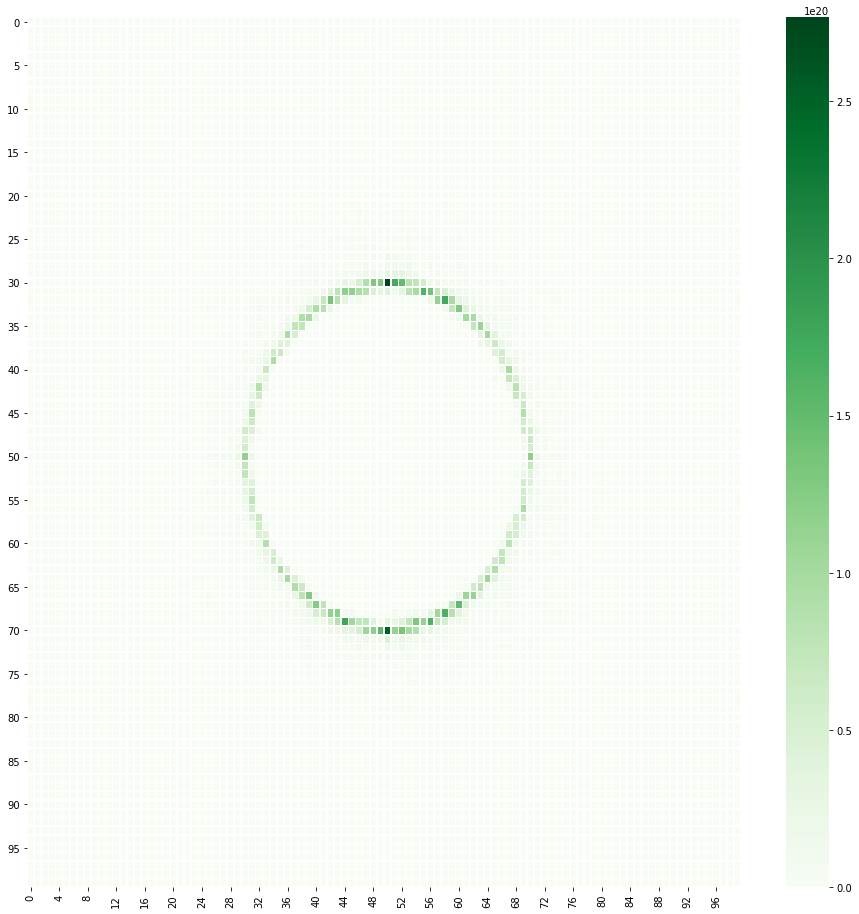

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix_force_field, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(16,16)
plt.show()

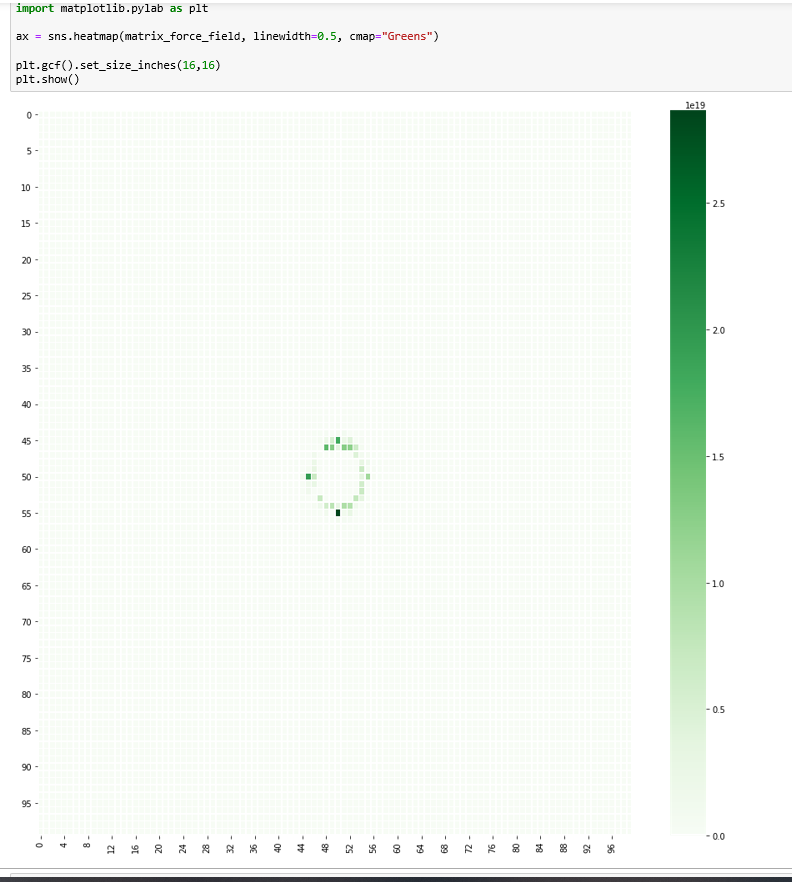

       L = 20*coef_lambda
       r > 5*coef_lambda

In [31]:
path = "Result/sigma_0_rho_0_D_T_0_D_R_0_N_100_0_0.bin"
n = 100

def read_data(path):
    with open(path, "br") as bf:
        data = np.fromfile(bf, np.float64)
    return data

def get_Pos_Vel(data, n, t):
    a = (t - 1)*(3*n + 1)
    b = t*(3*n + 1)
    
    x1 = []
    y1 = []
    u1 = []
    
    i = 0
    for d in range(a,b - 1):
        if (b - a - i)%3 == 0:
            x1.append(data[d])
        elif (b - a - i + 1)%3 == 0:
            y1.append(data[d])
        else:
            u1.append(data[d])
        i = i + 1
    return [x1, y1, u1]

In [32]:
def SumLabmdaWithVelocity(Va, Vb, a, coef_lambda):
    summ = 0.00
    
    for i in range(1,a):
        for k in range(1,a):
            summ = summ + i*coef_lambda*Va - k*coef_lambda*Vb
    return summ


def grad_in_radius(a, b, va, vb):
    grad_x_r = 0
    grad_y_r = 0 

    yi = y[a] - y[b] + SumLabmdaWithVelocity(vb[0], vb[1], 5, coef_lambda)
    xi = x[a] - x[b] + SumLabmdaWithVelocity(va[0], va[1], 5, coef_lambda)
    abs_r = math.sqrt(xi**2 + yi**2)
    if abs_r > 15*coef_lambda or abs_r <=0:
        return [0, 0]
    
    exp_r = math.exp(- abs_r / coef_lambda)
      
    grad_x_r = grad_x_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * xi
    grad_y_r = grad_y_r + ( - exp_r / abs_r ) * (coef_lambda + abs_r**4) / abs_r**8 * yi
    grad_x_r = grad_x_r * U_0 / (n**2) 
    grad_y_r = grad_y_r * U_0 / (n**2)
    return [grad_x_r, grad_y_r]
    

def grad(alfa, beta, va, vb):
    Xgrad_mod = grad_in_radius(alfa, beta, va, vb)[0]
    Ygrad_mod = grad_in_radius(alfa, beta, va, vb)[1]
    return [[Xgrad_mod], [Ygrad_mod]]

In [65]:
import time

size = 100

coef_lambda = 0.5
U_0 = 3e-20
L = 0.5

def length_vector(v):                               # vector 2x1
    try:
        return math.sqrt(v[0][0]**2 + v[1][0]**2)         # (x^2 + y^2)^0.5
    except TypeError:
        print("TypeError!")


def add_element_to_matrix(size, matrix, u, v, summ):
    if abs(u) > 1/2*L:
        if u > 0:
            u = u - L
        else:
            u = u + L
        
    if abs(v) > 1/2*L:
        if u > 0:
            v = v - L
        else:
            v = v + L    

    A =  int(size / 2 + int(u*size/L))
    B =  int(size / 2 + int(v*size/L))
    
    if abs(A) < size and abs(B) < size:
        matrix[A][B] = matrix[A][B] + summ

        
start_time = time.time()
matrix_force_field = np.zeros((size, size))

for i in range(0, 100):
    t = i*10 + 5
    x, y, u = get_Pos_Vel(read_data(path), n, t)
    print("Len :", len(x))

    print(x[1] - x[11])
    print("\n\n T = ", t)
    print("Start\nProgress:", end="")
    for k in range(0, n):
        for b in range(0, n):
            if k != b:
                dif = np.array([[x[k] - x[b]], [y[k] - y[b]]])

                vx = math.cos(u[b])
                vy = math.sin(u[b])
                Q = np.matrix([[vy, -vx], [vx, vy]])

                new_coordinates = np.dot(Q, dif)

                x_y = new_coordinates.tolist() # convert np.array -> list [[x], [y]]
                f_x = x_y[0][0]
                f_y = x_y[1][0]                   # maybe, x_y[1][0]

                forse_ab = np.array(grad(k, b, [math.cos(u[k]), math.sin(u[k])], [vx, vy]))
                abs_forse = length_vector(forse_ab.tolist())

                if abs_forse != 0:
                    add_element_to_matrix(size, matrix_force_field, f_x, f_y , abs_forse)   
        if k % 10 == 0:
            print("# ", k, " ", end="")

print("\n--- %s seconds ---" % (time.time() - start_time))

Len : 100
-0.0007807111633759168


 T =  5
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-0.000456492669547559


 T =  15
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-0.00033345902865634816


 T =  25
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
0.019703102611586004


 T =  35
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
0.00278420536220029


 T =  45
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
0.008684468789916352


 T =  55
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
0.00021052207709901466


 T =  65
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
37.2640613580357


 T =  75
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  8

Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-15.599969653167173


 T =  665
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-14.765986918438852


 T =  675
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-13.427644729129149


 T =  685
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-15.764306574205301


 T =  695
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-26.981360911988286


 T =  705
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-24.51492691025043


 T =  715
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-4.693364515639617


 T =  725
Start
Progress:#  0  #  10  #  20  #  30  #  40  #  50  #  60  #  70  #  80  #  90  Len : 100
-3.025526187991405


 T =  735
S

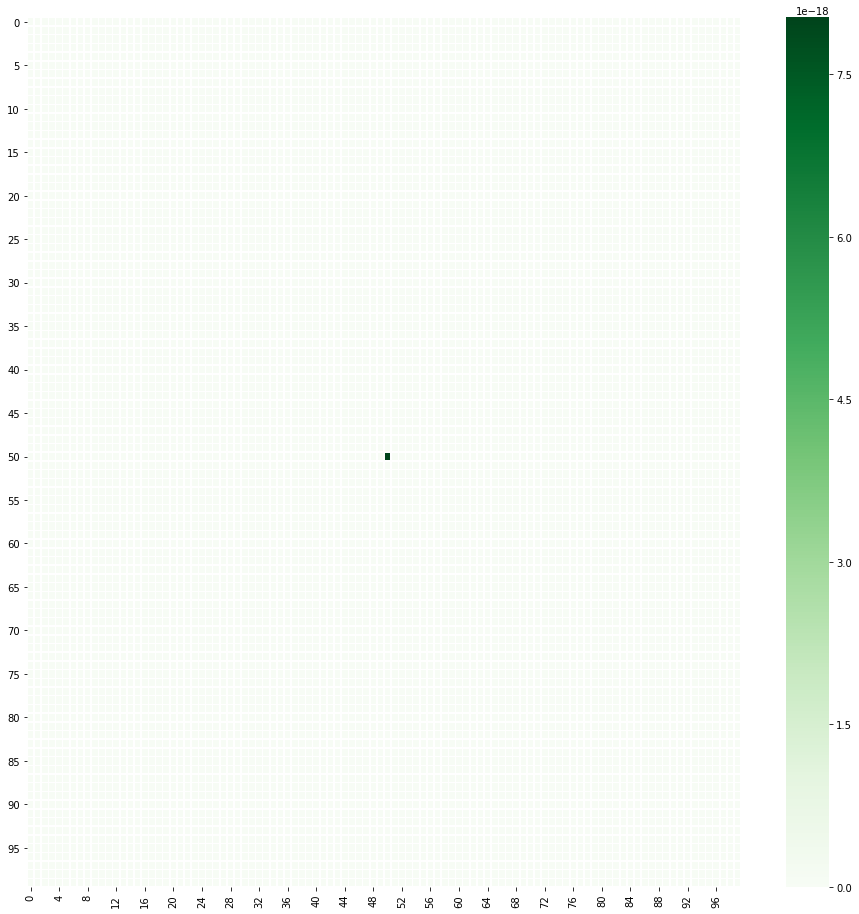

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(matrix_force_field, linewidth=0.5, cmap="Greens")

plt.gcf().set_size_inches(16,16)
plt.show()